### Zadanie: Pipeline
Wybierz zbiór danych z tych, które wykorzystywane były w module o regresji lub klasyfikacji. Dla któregoś z tych zbiorów stwórz Pipeline, w którym zawrzesz proces przygotowania danych i naucz nowy model, porównując go z tymi stworzonymi w tamtych modułach.

Zadanie wyślij Mentorowi w formie Notebooka zapisanego na Twoim repozytorium GitHub.

In [24]:
# manipulacja danymi
import numpy as np
import pandas as pd
# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns
# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV
# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer
# redukcja wymiarowości
from sklearn.decomposition import PCA
# model
from sklearn.linear_model import LogisticRegression
# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [25]:
dataset = pd.read_csv('diabetes.csv')
dataset

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [26]:
X = dataset.drop(['Diabetic'], axis=1).copy()
y = dataset['Diabetic'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                    random_state=42, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], 
                                                            X_test.shape[0]))

Treningowe obserwacje: 11250
Testowe obserwacje: 3750


In [27]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
            'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [29]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[('fill_missings', 
                                    SimpleImputer(strategy='mean'))])

In [30]:
print('Surowy zbiór danych - zbiór treningowy:')
print(X_train[num_features].isnull().mean())
X_train_trasnformed = num_preparation.fit_transform(X_train[num_features])
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór treningowy')
print(X_train_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór treningowy:
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64

Wyjście Pipeline - zbiór treningowy
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64


In [31]:
print('Surowy zbiór danych - zbiór testowy:')
print(X_test[num_features].isnull().mean())
X_test_trasnformed = num_preparation.transform(X_test[num_features])
X_test_trasnformed = pd.DataFrame(X_test_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór testowy')
print(X_test_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór testowy:
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64

Wyjście Pipeline - zbiór testowy
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64


In [32]:
# transformer = wartości numeryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)])

In [33]:
data_preparation.fit_transform(X_train)

array([[1.00000000e+01, 1.01000000e+02, 9.90000000e+01, ...,
        2.36255546e+01, 1.79500972e-01, 2.10000000e+01],
       [8.00000000e+00, 1.16000000e+02, 8.40000000e+01, ...,
        3.57983250e+01, 2.03872183e-01, 2.10000000e+01],
       [1.00000000e+00, 1.17000000e+02, 5.30000000e+01, ...,
        1.86664339e+01, 1.59149374e-01, 2.20000000e+01],
       ...,
       [0.00000000e+00, 1.01000000e+02, 6.00000000e+01, ...,
        3.86410823e+01, 2.40418134e-01, 2.30000000e+01],
       [1.00000000e+00, 1.70000000e+02, 5.90000000e+01, ...,
        3.63841863e+01, 7.02568660e-01, 2.30000000e+01],
       [1.00000000e+00, 5.40000000e+01, 7.80000000e+01, ...,
        2.10853008e+01, 1.70777940e-01, 2.20000000e+01]])

In [34]:
data_preparation.fit_transform(X_train).shape

(11250, 8)

In [35]:
# połączenie Pipeline z modelem
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [36]:
model_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree',
                                                   'Age'])])),
                ('model', LogisticRegression(max_iter=10000))])

In [37]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2500
           1       0.72      0.60      0.65      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.78      0.79      0.78      3750



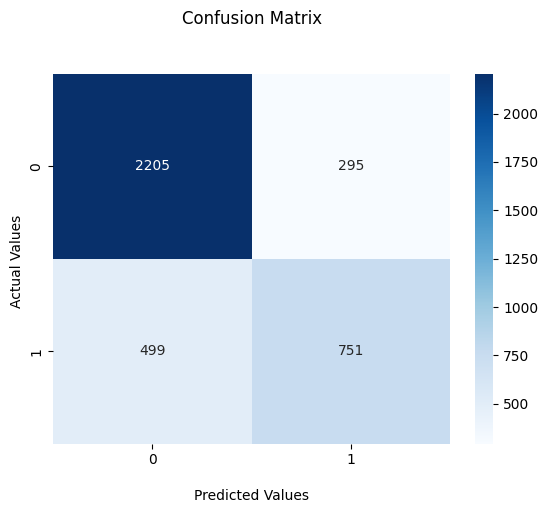

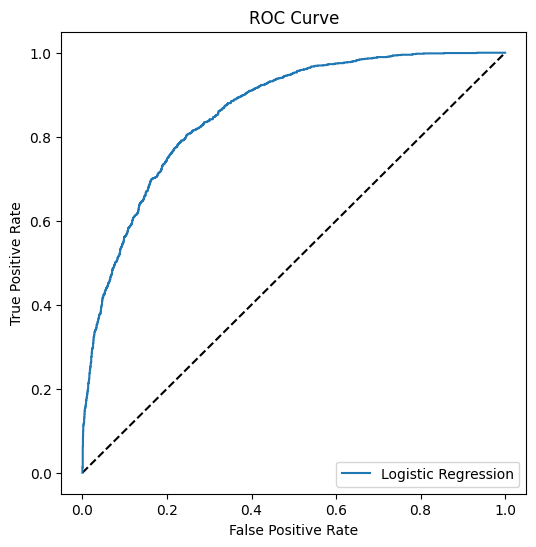

C:\Users\magda\AppData\Local\Temp\ipykernel_19912\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.8595


In [38]:
calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test)

In [39]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
            'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())])

# transformer = wartości numeryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])
model_pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler_1',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95)),
                                                                  ('scaler_2',
                                                                   StandardScaler())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree',
                                                   'Age'])])),
                ('model', LogisticRegression(max_iter=10000))])

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2500
           1       0.74      0.57      0.64      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.73      0.75      3750
weighted avg       0.78      0.79      0.78      3750



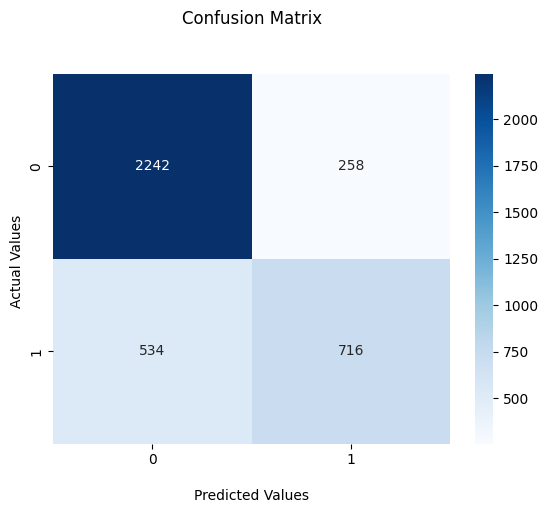

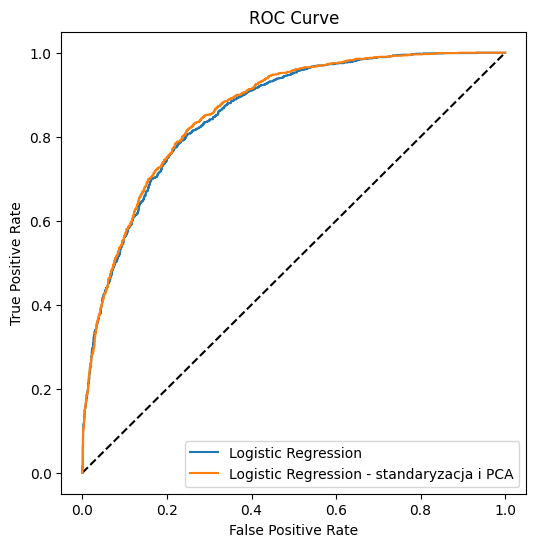

C:\Users\magda\AppData\Local\Temp\ipykernel_19912\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.859500
1,Logistic Regression - standaryzacja i PCA,0.643885,0.864173


In [40]:
calculate_metrics(model_pipeline_v2, 'Logistic Regression - standaryzacja i PCA', X_test, y_test)

### Porównanie z poprzednimi analizami z modułu 14

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                    random_state=42, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], 
                                                            X_test.shape[0]))

Treningowe obserwacje: 11250
Testowe obserwacje: 3750


              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2500
           1       0.72      0.60      0.65      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.78      0.79      0.78      3750



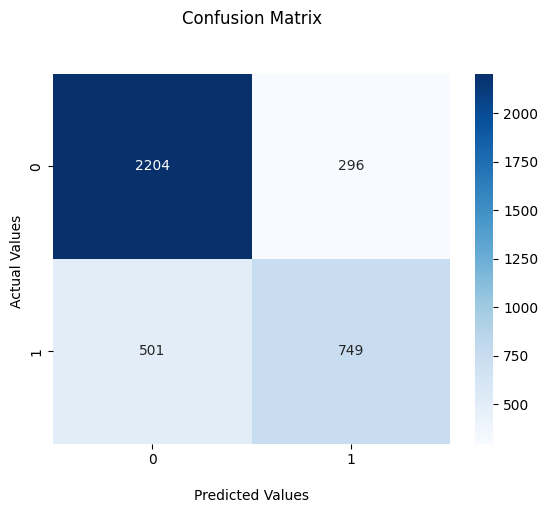

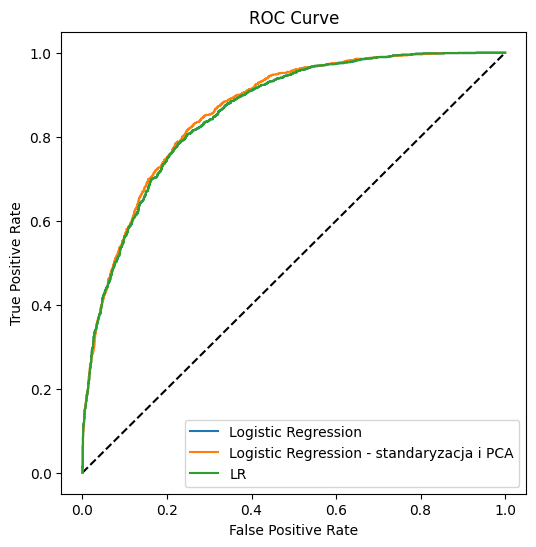

C:\Users\magda\AppData\Local\Temp\ipykernel_19912\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.859500
1,Logistic Regression - standaryzacja i PCA,0.643885,0.864173
2,LR,0.652723,0.859588


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

calculate_metrics(model_lr, 'LR', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2500
           1       0.83      0.74      0.78      1250

    accuracy                           0.86      3750
   macro avg       0.85      0.83      0.84      3750
weighted avg       0.86      0.86      0.86      3750



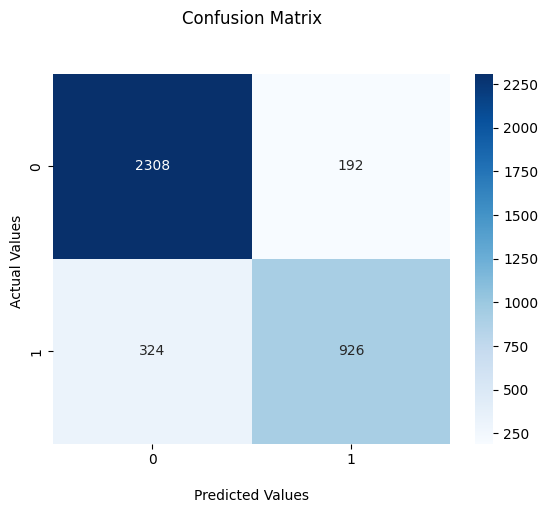

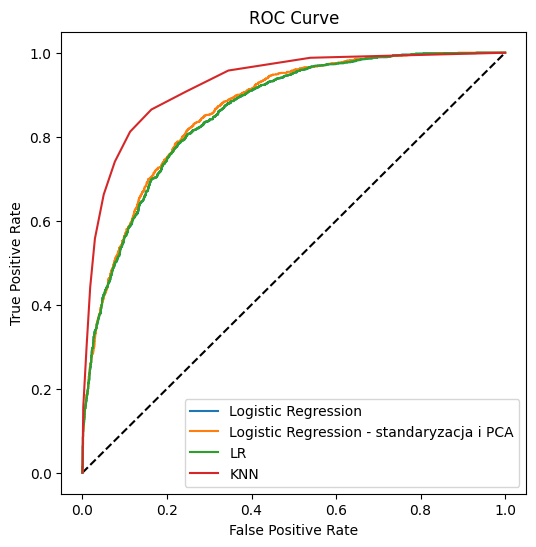

C:\Users\magda\AppData\Local\Temp\ipykernel_19912\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.859500
1,Logistic Regression - standaryzacja i PCA,0.643885,0.864173
2,LR,0.652723,0.859588
3,KNN,0.782095,0.924812


In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.001))
model_knn.fit(X_train_standardized, y_train)

calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2500
           1       0.81      0.81      0.81      1250

    accuracy                           0.87      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.87      0.87      0.87      3750



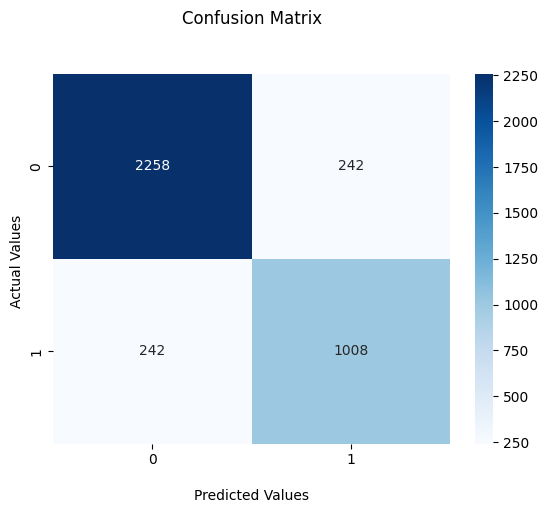

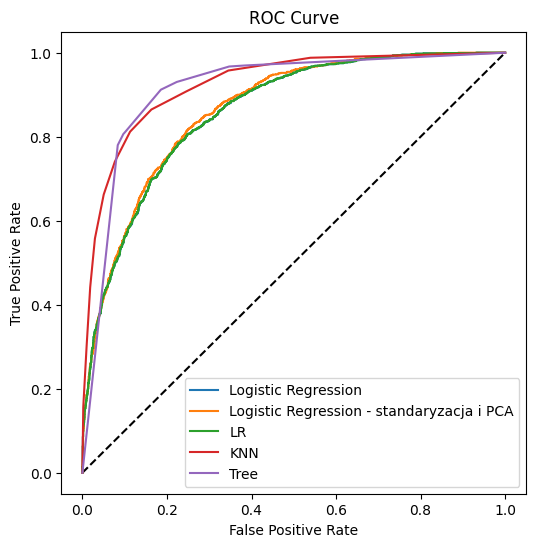

C:\Users\magda\AppData\Local\Temp\ipykernel_19912\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.859500
1,Logistic Regression - standaryzacja i PCA,0.643885,0.864173
2,LR,0.652723,0.859588
3,KNN,0.782095,0.924812
4,Tree,0.806400,0.913921


In [45]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(
                                    X_train.shape[0]*0.001))
model_tree.fit(X_train, y_train)

calculate_metrics(model_tree, 'Tree', X_test, y_test)

### Wnioski
Model, który stworzyliśmy w 15 rozdziale nie jest lepszy od Knn czy Tree, ale lepszy niż Logistic Regression z rozdziału 14. 